<a href="https://colab.research.google.com/github/mixa15341/Deep_Learning/blob/main/8.%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%BE-%D1%81%D0%BE%D1%81%D1%82%D1%8F%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F%20%D1%81%D0%B5%D1%82%D1%8C%20(GAN)/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%968_%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%BE_%D1%81%D0%BE%D1%81%D1%82%D1%8F%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C_(GAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №8. Генеративно-состязательная сеть (GAN)**

# Примечание:

Не забывайте периодически сохранять параметры модели. Функции для этого описаны в теоретической части. В случае приостановки процесса обучения из-за перегрузки ОЗУ, Вы сможете загрузить последние предобученные параметры и продолжить обучение.

# **Задание №1.** Обучите генератор воспризводить примитивные изображения. Датасет выберите по желанию. ([Пример №1](https://www.kaggle.com/datasets/andrewmvd/medical-mnist), [Пример №2](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data#example), [Пример №3](https://www.kaggle.com/datasets/sagyamthapa/handwritten-math-symbols))





In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

In [3]:
def build_generator():
    # Вектор случайного шума, используемый в качестве входного слоя для Генератора:
    noise_shape = (100,) # 1D массив размером 100 (латентный вектор / шум)

    model = Sequential()

    model.add(Dense(256, input_shape=noise_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

    model.summary()

    noise = Input(shape=noise_shape)
    img = model(noise)    # Генерация изображения

    return Model(noise, img)

In [4]:
def build_discriminator():


    model = Sequential()

    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    img = Input(shape=img_shape)
    validity = model(img)  # предположение дискриминатора о том, является ли входное изображение реальным или нет.

    return Model(img, validity)

In [5]:
from keras.models import load_model, save_model

def save(gan, generator, discriminator):
    root_path = ''
    discriminator.trainable = False
    save_model(gan, root_path+'gan')
    discriminator.trainable = True
    save_model(generator, root_path + 'generator')
    save_model(discriminator, root_path + 'discriminator')

In [6]:
def load():
    root_path = ''
    discriminator = load_model(root_path + 'discriminator')
    generator = load_model(root_path + 'generator')
    gan = load_model(root_path + 'gan')
    gan.summary()
    discriminator.summary()
    generator.summary()

    return gan, generator, discriminator

In [7]:
# Загружаем датасет из гугл-диска
# Импортируем os для работы с файловой системой
import os
datadir = 'lab8'
if os.path.isdir(datadir)>0:
    print ('Data directory already exists and it is not empty, miss downloading')
else:
    print ('Data directory does not exists or it is empty, download the dataset')
    !gdown --id 14e2kZMCi00yRdQm2XeJru5sVggymnYnO #Скопировать ID из ссылки на файл в гугл диске, предварительно нужно открыть доступ по ссылке.
    !unzip lab8.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: lab8/9/79548.jpg        
  inflating: lab8/9/79700.jpg        
  inflating: lab8/9/79719.jpg        
  inflating: lab8/9/79827.jpg        
  inflating: lab8/9/79838.jpg        
  inflating: lab8/9/7EsEQbyw.png     
  inflating: lab8/9/7lr2Xc7w.png     
  inflating: lab8/9/7Twsh8gG.png     
  inflating: lab8/9/7xp1s3sL.png     
  inflating: lab8/9/7zxVuQiG.png     
  inflating: lab8/9/80088.jpg        
  inflating: lab8/9/81331.jpg        
  inflating: lab8/9/81343.jpg        
  inflating: lab8/9/81992.jpg        
  inflating: lab8/9/82424.jpg        
  inflating: lab8/9/82481.jpg        
  inflating: lab8/9/82618.jpg        
  inflating: lab8/9/82909.jpg        
  inflating: lab8/9/82955.jpg        
  inflating: lab8/9/8312.jpg         
  inflating: lab8/9/83620.jpg        
  inflating: lab8/9/84099.jpg        
  inflating: lab8/9/84813.jpg        
  inflating: lab8/9/84882.jpg        
  inflating: lab8/9/

In [8]:
# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths
# Импортируем random для генерации случайных чисел
import random
# Импортируем cv2 для работы с изображениями
import cv2
imagePaths = sorted(list(paths.list_images('catdogs')))
random.shuffle(imagePaths)
def load_images(imagePaths, compression_size = 256):
  data = []
  half_length = len(imagePaths) // 4
  for imagePath in imagePaths[:half_length]:
    # Загрузка изображения
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

  return data

data = load_images(imagePaths, 256)
data = np.array(data, dtype="float") / 255.0

In [9]:

imagePaths = sorted(list(paths.list_images(datadir)))
random.shuffle(imagePaths)
def load_images(imagePaths, compression_size = 28):
  data = []
  half_length = len(imagePaths) // 4
  for imagePath in imagePaths[:half_length]:
    # Загрузка изображения
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.resize(image, (compression_size, compression_size))

    # Добавление изображения в список
    data.append(image)

  return data

data = load_images(imagePaths, 28)
data = np.array(data, dtype="float") / 255.0

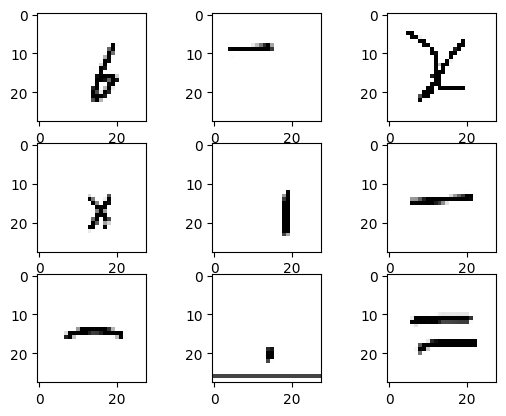

In [10]:
import matplotlib.pyplot as plt

for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(data[i], cmap=plt.get_cmap('gray'))

plt.show()

In [17]:
X_train, _ = train_test_split(data, test_size=0.25, random_state=28)
X_train = np.dot(X_train[...,:3], [0.2989, 0.5870, 0.1140])
X_train = np.expand_dims(X_train, axis=-1)
X_train = 255 - X_train
X_train.shape

(1887, 28, 28, 1)

In [29]:
# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
def train(epochs, batch_size=128, save_interval=50):

    # Загружаем набор данных
    X_train, _ = train_test_split(data, test_size=0.25, random_state=28)
    X_train = np.dot(X_train[...,:3], [0.2989, 0.5870, 0.1140])
    X_train = np.expand_dims(X_train, axis=-1)
    X_train = 255 - X_train
    X_train.shape
    # Преобразование в тип float и нормализация от -1 до 1 (можно также от 0 до 1)
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5

    #Добавляем размерность каналов. В качестве входных данных для наших gen и discr. имеет форму 28x28x1.
    X_train = np.expand_dims(X_train, axis=3)
    half_batch = int(batch_size / 2)


    # Обучаем Дискриминатор,
    # выбираем случайную партию изображений из нашего истинного набора данных,
    # генерируем набор изображений с помощью Генератора, затем подаём оба набора изображений в наш Дискриминатор,
    # и, наконец, вычисляем параметры функции потерь для реальных и сгенерированных
    #  (поддельных) изображений, а также комбинированные потери.

    for epoch in range(epochs):

        # ---------------------
        #  Обучение Дискриминатора
        # ---------------------

        # Выберите случайную половину партии реальных изображений
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]


        noise = np.random.normal(0, 1, (half_batch, 100))

        # Сгенерируем половину партии поддельных изображений
        gen_imgs = generator.predict(noise)

        # Обучение дискриминатора на реальных и поддельных изображениях отдельно.
        # Исследования показали, что раздельное обучение более эффективно.
        d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))

        # Процесс обучения происходит с помощью метода train_on_batch()
        # Метод `train_on_batch` обновляет веса модели на основе одной партии данных,
        # в отличие от метода `fit`, который использует весь набор данных для обучения.
        # Это делает `train_on_batch` идеальным для обучения на больших наборах
        # данных или для реализации более сложных процедур обучения.
        # Ссылка:https://keras.io/api/models/model_training_apis/

        # Вычисление средней потери от реальных и поддельных изображений.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        #И в том же цикле мы обучаем наш Генератор, задавая входной шум
        # и в конечном итоге обучая Генератор тому, чтобы Дискриминатор
        # помечал его образцы как достоверные задавая градиентные потери.

        # ---------------------
        #  Обучение Генератора
        # ---------------------

        #Создаём векторы случайного шума в качестве входных данных для генератора.
        # На каждую партию необходимо создать свой вектор.
        # Шум основано на нормальном распределении (от 0 до 1).
        # Выходные данные будут иметь размер (размер партии, 100)

        noise = np.random.normal(0, 1, (batch_size, 100))

        # Генератору необходимо добиться того, чтобы дискриминатор пометил сгенерированные образцы
        # как истинные (1)
        # Здесь генератор пытается "обмануть" дискриминатор, чтобы тот "поверил", в то
        # что сгенерированный образ является истинным (отсюда значение 1 для y)
        valid_y = np.array([1] * batch_size) #Создает массив всех единиц размера size=batch size

        # Генератор является частью комбинированной системы, где он напрямую связан с дискриминатором.
        # Обучим генератор, используя шум в качестве x и 1 в качестве y.
        # Опять же, 1 в качестве выхода, так как он состязательный,
        # и если генератор отлично справился со своей р работой по следованию дискриминатору, то на выходе будет 1 (истина).

        g_loss = combined.train_on_batch(noise, valid_y)


#Дополнительно, чтобы мы могли отслеживать процесс обучения, мы выводим на печать
# прогресс и сохраняем вывод образцов изображений в зависимости от заданного интервала эпох,
# а также по желанию, можем сохранять модель.

        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

        # Если в интервале сохранения => сохраняем сгенерированные образцы изображений
        if epoch % save_interval == 0:
            save_imgs(epoch)
            if epoch % 1000 == 0:
                # save(combined, generator, discriminator)
                save(combined, generator, discriminator)

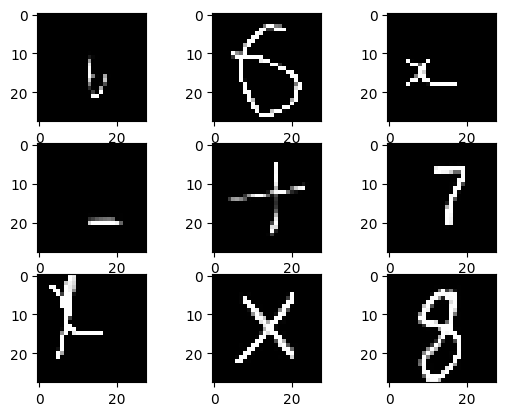

In [30]:
import matplotlib.pyplot as plt

for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [31]:
def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("mnist_%d.png" % epoch)
    plt.close()

In [32]:
# Определим наш оптимизатор для удобства использования в дальнейшем.
optimizer = Adam(0.0002, 0.5)  #Скорость обучения и экспоненциальная скорость затухания для оценок первого момента.

In [33]:
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 533505 (2.04 MB)
Trainable params: 53350

In [34]:
generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               25856     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                                     

In [35]:
z = Input(shape=(100,))
img = generator(z)

In [36]:
discriminator.trainable = False

In [37]:
valid = discriminator(img)  #Проверка достоверности сгенерированного изображения

In [38]:
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
train(epochs=25000, batch_size=32, save_interval=1000)

generator.save('generator_model_final.h5')

1/1 [==============================] - 0s 109ms/step
0 [D loss: 0.770065, acc.: 21.88%] [G loss: 0.682536]
1/1 [==============================] - 0s 20ms/step
1 [D loss: 0.348262, acc.: 84.38%] [G loss: 0.719764]
1/1 [==============================] - 0s 18ms/step
2 [D loss: 0.320422, acc.: 90.62%] [G loss: 0.860651]
1/1 [==============================] - 0s 22ms/step
3 [D loss: 0.320191, acc.: 90.62%] [G loss: 0.906470]
1/1 [==============================] - 0s 19ms/step
4 [D loss: 0.294924, acc.: 90.62%] [G loss: 0.991159]
1/1 [==============================] - 0s 19ms/step
5 [D loss: 0.268380, acc.: 100.00%] [G loss: 1.109087]
1/1 [==============================] - 0s 18ms/step
6 [D loss: 0.228180, acc.: 100.00%] [G loss: 1.206081]
1/1 [==============================] - 0s 17ms/step
7 [D loss: 0.197393, acc.: 100.00%] [G loss: 1.419820]
1/1 [==============================] - 0s 19ms/step
8 [D loss: 0.156061, acc.: 100.00%] [G loss: 1.579308]
1/1 [==============================] - 0s

### Демонстрация сгенерированных изображений:

1/1 [==============================] - 0s 21ms/step


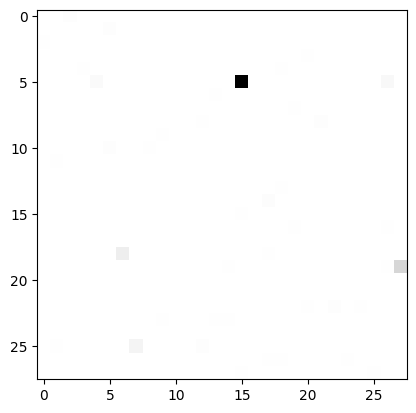

In [74]:
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
from numpy.random import randn

# model = load_model('generator_model_final.h5')
model = generator

# Чтобы создать одинаковое изображение, каждый раз подавайте один и тот же вектор.

#Для создания случайных изображений каждый раз...
vector = randn(100) #Вектор случайных чисел (создает столбец, необходимо изменить форму)
vector = vector.reshape(1, 100)

# сгенеруем изображение
X = model.predict(vector)

# Выведем результат
pyplot.imshow(X[0, :, :, 0], cmap='gray_r')
pyplot.show()

# **Задание №2.** Обучите генератор воспризводить примитивные изображения по заданному условию (Conditional Generative Adversarial Nets (CGAN)).

(На вход генератора подается вектор случайного шума и метка класса - на выходе должно получиться изображение, соответствующее данному классу)

Датасет выберите по желанию. ([Пример №1](https://www.kaggle.com/datasets/andrewmvd/medical-mnist), [Пример №2](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data#example), [Пример №3](https://www.kaggle.com/datasets/sagyamthapa/handwritten-math-symbols))

In [ ]:
# Ваш код

### Демонстрация сгенерированных изображений:

In [ ]:
# Ваш код

# **Задание №3.** Обучите генератор воспризводить **спутниковый снимок** по **загруженной маске** (pix2pix). Используйте для этого разделенный на патчи  [датасет](https://www.kaggle.com/datasets/humansintheloop/semantic-segmentation-of-aerial-imagery)

In [ ]:
# Ваш код

### Демонстрация сгенерированных изображений:

In [ ]:
# Ваш код

# **Задание №4.** Обучите генератор воспроизводить изображения из выбранного Вами датасета (pix2pix).

### Датасет может быть сформирован Вами (например, черно-белые и цветные изображения) или найден в глобальной сети Интернет.

#### Например [тут](https://www.kaggle.com/search?q=pix2pix+in%3Adatasets+datasetFileTypes%3Ajpg+datasetFileTypes%3Apng) или [тут](http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/)

In [ ]:
# Ваш код

### Демонстрация сгенерированных изображений:

In [ ]:
# Ваш код